In [1]:
from matplotlib import animation as animation
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import time
import matplotlib
from IPython.display import HTML
import matplotlib.patches as patches

In [74]:
dir='D:/dataset_hand_action/dataFPHA/Subject_1/high_five//1/skeleton.txt'

In [75]:
def readData(dir):
    lines = open(dir,'rt').read().strip().split('\n')
    skeleton_data=[]
    for l in lines:
        frame_data = np.array([float(v) for v in l.strip().split(' ')])
        frame_data = frame_data[1:]
        frame_data = np.reshape(frame_data,(21,3))
        skeleton_data.append(frame_data)
    skeleton_data=np.array(skeleton_data)
    
    #print(skeleton_data.shape)
    return skeleton_data
#data3d=readData(dir)

#print(data3d[1])
def readData2(dir):
    lines = open(dir,'rt').read().strip().split('\n')
    frame_num = int(len(lines) / 21)
    frameDatas=[]
    for frame in range(frame_num):
                frameData = skeletonData[(frame*21):(frame+1)*21]
                frameDatas.append(frameData)
    frameDatas=np.array(frameDatas)
    return frameDatas

data3d=readData(dir)
predict_name='write'    
    
        
        
        

(88, 21, 3)
111.4325 42.2817


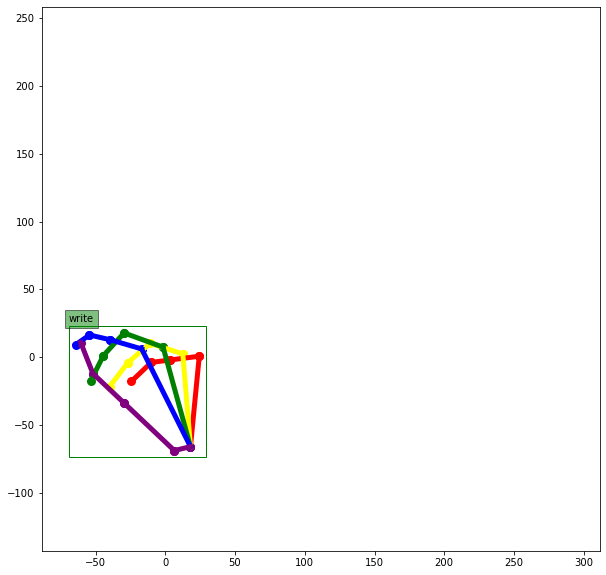

In [76]:
def anim_skel(data3D,predict_name):
    seq = data3D
    fig = plt.figure(figsize=[10,10]) 
    ax = fig.add_subplot(111)
    lines = []
    sct=[]
    print(seq.shape)
    N = len(seq)
    data = np.array(list(range(0,N))).transpose()
    #joints order
    joints_order_org=[v-1 for v in [1,2,2,7,7,8,8,9,1,3,3,10,10,11,11,12,1,4,4,13,13,14,14,15,1,5,5,16,16,17,17,18,1,6,6,19,19,20,20,21]]
    joints_order = joints_order_org[::-1]
    #print(len(joints_order))
    skel = seq [0,:,:] 
    #color list
    c=['purple','blue','green','yellow','red']
    c.reverse()
    count_color,count= 0,1

    for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
            xs, ys = [],[]
            xs=[skel[id1,0],skel[id2,0]]
            ys=[100-skel[id1,1],100-skel[id2,1]]
            line,= plt.plot(xs,ys,color=c[count_color],lw=5)
            scatter=plt.scatter(xs,ys,color=c[count_color],lw=3)
            if(count%4==0):
                count_color+=1
            count+=1
            lines.append(line)
            sct.append(scatter)
    minx,miny=min(seq[0,:,0]),min(seq[0,:,1])
    maxx,maxy=max(seq[0,:,0])-minx,max(seq[0,:,1])-miny
    rect = patches.Rectangle((minx,miny),maxx, maxy, linewidth=1, edgecolor='green', facecolor='none',label="change")
    
    ax.add_patch(rect)
    text=ax.text(minx, maxy, predict_name)
    text.set_bbox(dict(facecolor='green', alpha=0.5))
    plt.grid(False)
    print(seq[0,0,0],seq[0,0,1])
    plt.xlim(seq[0,0,0]-200,seq[0,0,0]+200)
    plt.ylim(100-seq[0,0,1]-200,100-seq[0,0,1]+200)
    #plt.text(rect,)

    #plt.legend(rect,"hii")
    def update(num,data, lines,sct,rect,text):
            for i,line in enumerate(lines):
                segment = np.zeros((2,2))
                joint_1 = joints_order[i*2]
                joint_2 = joints_order[i*2+1]
                #print(joint_1,joint_2)
                xs=[seq[num,joint_1,0],seq[num,joint_2,0]]
               
                ys=[100-seq[num,joint_1,1],100-seq[num,joint_2,1]]
                #print(xs,ys)
                data=np.hstack((xs,ys))
                data=data.reshape(2,2).transpose()
                #print(data)
                line.set_xdata(xs)
                line.set_ydata(ys)
                sct[i].set_offsets(data)
                
            minx,miny=min(seq[num,:,0])-5,min(100-seq[num,:,1])-5
            maxx,maxy=max(seq[num,:,0])-minx+5,max(100-seq[num,:,1])-miny+5
            rect.set_width(maxx)
            rect.set_height(maxy)
            rect.set_xy((minx,miny))
            text.set_position((rect.get_x(),rect.get_height()+3+rect.get_y()))

            #return lines, rect, sct
    anim = animation.FuncAnimation(fig, update, frames=N,fargs=(data,lines,sct,rect,text),interval=100,)            
    anim.save('t2.gif',  writer='pillow')
    #HTML(anim.to_html5_video())
    #anim.save('o.gif','pillow')
anim_skel(data3d,predict_name)

In [ ]:
import os #xử lí các đường dẫn 
import numpy as np

class cvtData:

    def cvt_Data():
        if not os.path.exists('./fphab_data/newData'):
            os.mkdir('./fphab_data/newData')
            #for i in range(1,7):
            #    os.mkdir('./fphab_data/newData/Subject_'+str(i))
        subject_list = os.listdir('./fphab_data/data')
        for s in subject_list: # 6subject
            action_list = os.listdir('./fphab_data/data/'+s) # danh sach hoat dong
            index=0
            for a in action_list:
                index+=1
                number=os.listdir('./fphab_data/data/'+s+'/'+a)
                datas=[]
                for i in number:
                    lines= open('./fphab_data/data/'+s+'/'+a+'/'+i+'/skeleton.txt','rt').read().strip().split('\n')
                    f=open('./fphab_data/newData/'+str(index)+'_'+s+'_'+i+'.txt','w')
                    for l in lines:
                        frame_data =  l.strip().split(' ')
                        frame_data = frame_data[1:]
                        count=1
                        for fr in frame_data:
                            fr=str(fr)
                            f.write(fr+' ')
                            if count%3==0:
                                f.write('\n')
                            count+=1

cvtData.cvt_Data()
print('done')
        
        

In [29]:
dir='D:\\\download\\UAV_human_train_val.pkl'
#dir_2='D:\\\download\\UAV_human_train_val_test.pkl'
pkl= open(dir,'rb')
pkl= pickle.load(pkl)
all_seq=pkl['train_seq']
sample= all_seq[10:19]

IndexError: list index out of range

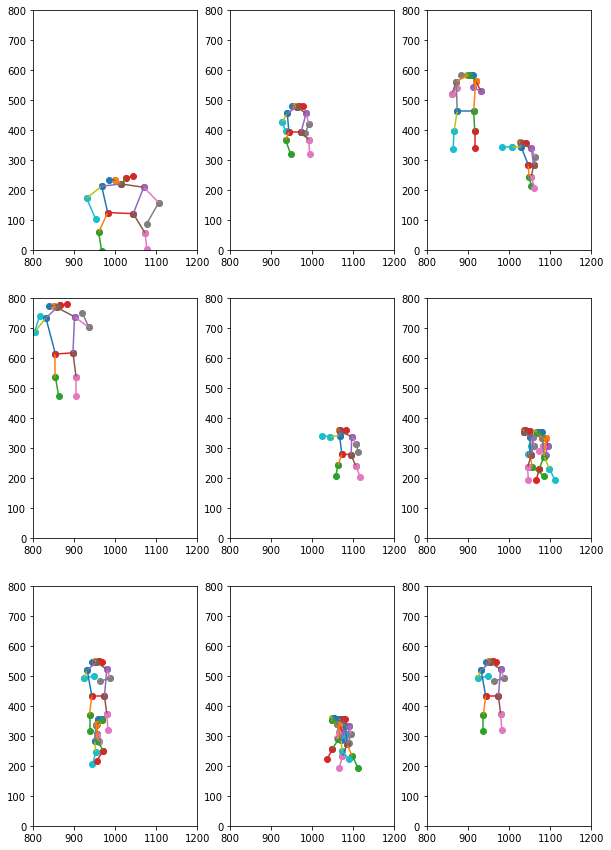

In [40]:
from matplotlib import animation as animation
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import time
import matplotlib
import matplotlib.patches as patches
import pickle
#joints order
joints_order_org=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]

def anim_skel():
    fig=plt.figure(figsize=(10,15))
    plots = []
    all_line=[]
    all_sct=[]
    for i in range(3):
        for j in range(3):
            ax = plt.subplot2grid((3,3), (i,j))
            seq = sample[i*3+j]
            person_num = seq.shape[1]
            #print(person_num)
            #joints order
            #joints order
            joints_order=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]
            plt.xlim(800,1200)
            plt.ylim(0,800)
            #joints_order_org=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]

            for p in range(person_num):
                lines = []
                sct=[]
                N = seq.shape[0]
                data = np.array(list(range(0,N))).transpose()               
                #print(len(joints_order))
                skel = seq [0,p,:,:] 
                #color list
                    
 
                for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
                    xs, ys = [],[]
                    xs=[skel[id1,0],skel[id2,0]]
                    ys=[1000-skel[id1,1],1000-skel[id2,1]]
                    line,= plt.plot(xs,ys)
                    scatter=plt.scatter(xs,ys)
         
                    lines.append(line)
                    sct.append(scatter)    
                all_line.append(lines)
                all_sct.append(sct)
                #print(len(all_line))
            
            def update( line,scatter):
                #for s in range(len(sample)):
                    #print(len(sample))
                    l=[]
                    for lines,sct in  zip(all_line,all_sct):  
                        s=len(l)
                        l.append(lines)
                        for i,line in enumerate(lines):
                            
                            segment = np.zeros((2,2))
                            joint_1 = joints_order[i*2]
                            joint_2 = joints_order[i*2+1]
                            #print(joint_1,joint_2)
                            xs=[sample[s][num,p,joint_1,0],sample[s][num,p,joint_2,0]]              
                            ys=[1000-sample[s][num,p,joint_1,1],1000-sample[s][num,p,joint_2,1]]
                            #print(xs,ys)
                            data=np.hstack((xs,ys))
                            data=data.reshape(2,2).transpose()
                                    #print(data)
                            line.set_xdata(xs)
                            line.set_ydata(ys)
                            sct[i].set_offsets(data)
                        #s+=1
            
                
    anim = animation.FuncAnimation(fig, update, frames=N,fargs=(lines,sct),interval=100,)        
    anim.save('_sub_1_seq_3' '.gif',  writer='pillow')
    print('done')

anim_skel()

In [22]:
print(sample[1][1,0,0,0])

976.1287841796875


In [28]:
print(len(sample))

10


In [2]:
from matplotlib import animation as animation
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.pyplot as plt
import time
import matplotlib
import matplotlib.patches as patches
import pickle
#joints order
#joints_order_org=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]

def anim_skel():
    for s in range(len(sample)):
            fig=plt.figure(figsize=(3,3))
            plots = []

            #ax = plt.subplot2grid((3,3), (i,j))
            seq = sample[s]
            person_num = seq.shape[1]
            #print(person_num)
            #joints order
            #joints order
            joints_order=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]
             
            plt.xlim(800,1200)
            plt.ylim(0,800)
            if person_num==2:   
                plt.xlim(900,1100)
                plt.ylim(100,500)
            #joints_order_org=[v for v in [4,2,2,0,0,1,1,3,0,6,0,5,5,7,7,9,6,8,8,10,6,12,12,14,14,16,12,11,5,11,11,13,13,15]]
            all_line=[]
            all_sct=[]
            for p in range(person_num):
                lines = []
                sct=[]
                N = seq.shape[0]
                data = np.array(list(range(0,N))).transpose()               
                #print(len(joints_order))
                skel = seq [0,p,:,:] 
                #color list
                    
 
                for id1,id2 in zip(joints_order[::2],joints_order[1::2]):    
                    xs, ys = [],[]
                    xs=[skel[id1,0],skel[id2,0]]
                    ys=[1000-skel[id1,1],1000-skel[id2,1]]
                    line,= plt.plot(xs,ys)
                    scatter=plt.scatter(xs,ys)
         
                    lines.append(line)
                    sct.append(scatter)    
                all_line.append(lines)
                all_sct.append(sct)
                #print(len(all_line))
            
            def update(num,data, lines,sct):
                
                for p,lines in enumerate(all_line):
                        for i,line in enumerate(lines):
                            segment = np.zeros((2,2))
                            joint_1 = joints_order[i*2]
                            joint_2 = joints_order[i*2+1]
                            #print(joint_1,joint_2)
                            xs=[sample[s][num,p,joint_1,0],sample[s][num,p,joint_2,0]]              
                            ys=[1000-sample[s][num,p,joint_1,1],1000-sample[s][num,p,joint_2,1]]
                            #print(xs,ys)
                            data=np.hstack((xs,ys))
                            data=data.reshape(2,2).transpose()
                                    #print(data)
                            line.set_xdata(xs)
                            line.set_ydata(ys)
                            all_sct[p][i].set_offsets(data)
                        #s+=1
            
                
            anim = animation.FuncAnimation(fig, update, frames=N,fargs=(data,lines,sct),interval=100,)        
            anim.save(str(s)+ '.mp4',  writer='pillow')
            #print('done')

anim_skel()

NameError: name 'sample' is not defined